In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install uproot awkward lz4 xxhash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.8/343.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 742.2/742.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 14.7 MB/s eta 0:00:00


In [ ]:
import uproot
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
f = uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown4.root: DecayTree")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Retrieving the 3-space momentum of each daughter particle
Px_H1 = f["H1_PX"].array(library="np")
Py_H1 = f["H1_PY"].array(library="np")
Pz_H1 = f["H1_PZ"].array(library="np")

Ptot_H1 = sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)

Px_H2 = f["H2_PX"].array(library="np")
Py_H2 = f["H2_PY"].array(library="np")
Pz_H2 = f["H2_PZ"].array(library="np")

Ptot_H2 = sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)

Px_H3 = f["H3_PX"].array(library="np")
Py_H3 = f["H3_PY"].array(library="np")
Pz_H3 = f["H3_PZ"].array(library="np")

Ptot_H3 = sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)

#Constructing the total momentum of the B meson
M_Ptot = sqrt((Px_H1 + Py_H1 + Pz_H1)**2 + (Px_H2 + Py_H2 + Pz_H2)**2 + (Px_H3 + Py_H3 + Pz_H3)**2)

print(Ptot_H1)

[ 51828.26 326248.07  90801.38 ...  37255.64  35914.59   5211.04]


Text(0.5, 0, 'Mass (Mev/c^2)')

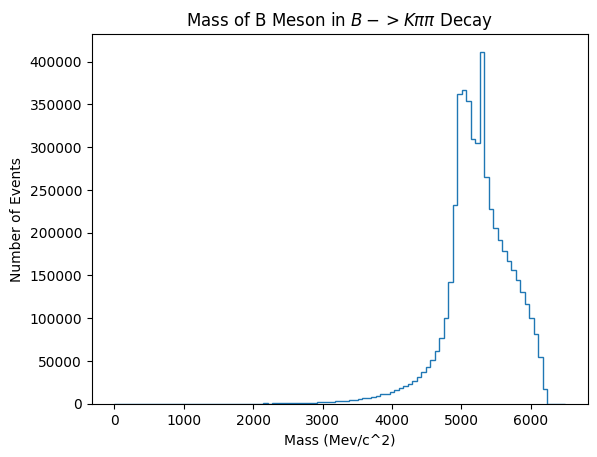

In [ ]:
#Mass of a Kaon in MeV/c^2
mass_K = 493.677
#Mass of Pion in MeV/c^2
mass_pi = 135

#Constructing the mass of each daughter particle in the B->Kpipi decay
E_H1TOT = sqrt(mass_pi**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2TOT = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3TOT = sqrt(mass_pi**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total mass of the B meson
E_TOT = E_H1TOT + E_H2TOT + E_H3TOT

#Constructing the total momentum of the B meson
P_TOT = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother = sqrt(E_TOT**2 - P_TOT**2)

#Plotting the B meson's mass
plt.hist(mass_mother,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in $B->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

Text(0.5, 0, 'Mass (Mev/c^2)')

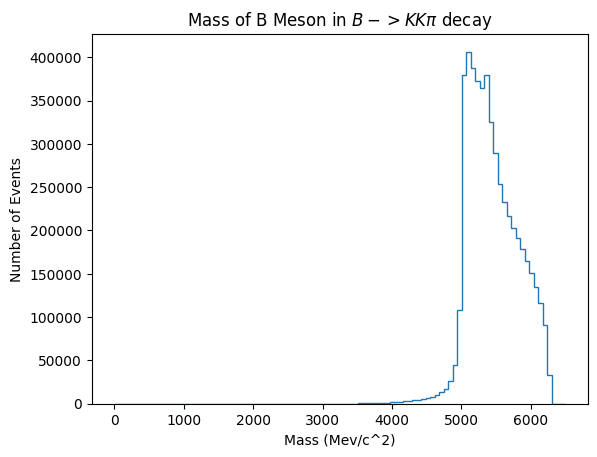

In [ ]:
#Constructing the mass of each daughter particle in the B->KKpi decay
E_H1TOT2 = sqrt(mass_K**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2TOT2 = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3TOT2 = sqrt(mass_pi**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total energy of the B meson
E_TOT2 = E_H1TOT2 + E_H2TOT2 + E_H3TOT2

#Constructing the total momentum of the B meson
P_TOT2 = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother2 = sqrt(E_TOT2**2 - P_TOT2**2)

#Plotting the mass for the B->KKpi decay
plt.hist(mass_mother2,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in $B->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Seperate the full data into B+ and B- KPP
Tree_full_minus = f.arrays(cut="(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)")
Tree_full_plus = f.arrays(cut="(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)")
#These are shared between the KPP and upcoming KKP, hence the variable name does not specify

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_full_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_full_minus["H1_PX"]**2 + Tree_full_minus["H1_PY"]**2 + Tree_full_minus["H1_PZ"]**2)**2)
E_H2TOT_full_minusKPP = sqrt(mass_K**2 + sqrt(Tree_full_minus["H2_PX"]**2 + Tree_full_minus["H2_PY"]**2 + Tree_full_minus["H2_PZ"]**2)**2)
E_H3TOT_full_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_full_minus["H3_PX"]**2 + Tree_full_minus["H3_PY"]**2 + Tree_full_minus["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_full_minusKPP = E_H1TOT_full_minusKPP + E_H2TOT_full_minusKPP + E_H3TOT_full_minusKPP

#Assigning the total cut momentum into a variable
P_TOT_full_minusKPP = sqrt((Tree_full_minus["H1_PX"] + Tree_full_minus["H2_PX"] + Tree_full_minus["H3_PX"])**2 + (Tree_full_minus["H1_PY"] + Tree_full_minus["H2_PY"] + Tree_full_minus["H3_PY"])**2 + (Tree_full_minus["H1_PZ"] + Tree_full_minus["H2_PZ"] + Tree_full_minus["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_full_minusKPP = sqrt(E_TOT_full_minusKPP**2 - P_TOT_full_minusKPP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_full_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_full_plus["H1_PX"]**2 + Tree_full_plus["H1_PY"]**2 + Tree_full_plus["H1_PZ"]**2)**2)
E_H2TOT_full_plusKPP = sqrt(mass_K**2 + sqrt(Tree_full_plus["H2_PX"]**2 + Tree_full_plus["H2_PY"]**2 + Tree_full_plus["H2_PZ"]**2)**2)
E_H3TOT_full_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_full_plus["H3_PX"]**2 + Tree_full_plus["H3_PY"]**2 + Tree_full_plus["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_full_plusKPP = E_H1TOT_full_plusKPP + E_H2TOT_full_plusKPP + E_H3TOT_full_plusKPP

#Assigning the total cut momentum into a variable
P_TOT_full_plusKPP = sqrt((Tree_full_plus["H1_PX"] + Tree_full_plus["H2_PX"] + Tree_full_plus["H3_PX"])**2 + (Tree_full_plus["H1_PY"] + Tree_full_plus["H2_PY"] + Tree_full_plus["H3_PY"])**2 + (Tree_full_plus["H1_PZ"] + Tree_full_plus["H2_PZ"] + Tree_full_plus["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_full_plusKPP = sqrt(E_TOT_full_plusKPP**2 - P_TOT_full_plusKPP**2)

In [ ]:
print(len(mass_mother_full_plusKPP))
print(len(mass_mother_full_minusKPP))
mass_mother_full_neg_plusKPP = []
mass_mother_full_neg_minusKPP = []
mass_mother_full_pos_plusKPP = []
mass_mother_full_pos_minusKPP = []

for i in mass_mother_full_plusKPP:
  if i < 0:
    mass_mother_full_neg_plusKPP.append(i)
  if i > 0:
    mass_mother_full_pos_plusKPP.append(i)

for i in mass_mother_full_minusKPP:
  if i < 0:
    mass_mother_full_neg_minusKPP.append(i)
  if i > 0:
    mass_mother_full_pos_minusKPP.append(i)

print(len(mass_mother_full_neg_plusKPP))
print(len(mass_mother_full_neg_minusKPP))
print(len(mass_mother_full_pos_plusKPP))
print(len(mass_mother_full_pos_minusKPP))

2610178
2525645
0
0
2610178
2525645


In [ ]:

#So I'm separating the data into B+ and B- data according to the analysis from the previous block, KPP
#Tree_Cut_minusKPP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.2)&(H1_ProbPi>0.01)&(H2_isMuon==0)&(H2_ProbK>0.2)&(H2_ProbPi>0.01)&(H3_isMuon==0)&(H3_ProbK>0.01)&(H3_ProbPi>0.2)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
#Tree_Cut_plusKPP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.2)&(H1_ProbPi>0.01)&(H2_isMuon==0)&(H2_ProbK>0.2)&(H2_ProbPi>0.01)&(H3_isMuon==0)&(H3_ProbK>0.01)&(H3_ProbPi>0.2)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

Tree_Cut_minusKPP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK<0.9)&(H1_ProbPi>0.1)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plusKPP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK<0.9)&(H1_ProbPi>0.1)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Cut_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKPP["H2_PX"]**2 + Tree_Cut_minusKPP["H2_PY"]**2 + Tree_Cut_minusKPP["H2_PZ"]**2)**2)
E_H2TOT_Cut_minusKPP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKPP["H1_PX"]**2 + Tree_Cut_minusKPP["H1_PY"]**2 + Tree_Cut_minusKPP["H1_PZ"]**2)**2)
E_H3TOT_Cut_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKPP["H3_PX"]**2 + Tree_Cut_minusKPP["H3_PY"]**2 + Tree_Cut_minusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_minusKPP = E_H1TOT_Cut_minusKPP + E_H2TOT_Cut_minusKPP + E_H3TOT_Cut_minusKPP

#Assigning the total cut momentum into a variable
P_TOTCUT_minusKPP = sqrt((Tree_Cut_minusKPP["H1_PX"] + Tree_Cut_minusKPP["H2_PX"] + Tree_Cut_minusKPP["H3_PX"])**2 + (Tree_Cut_minusKPP["H1_PY"] + Tree_Cut_minusKPP["H2_PY"] + Tree_Cut_minusKPP["H3_PY"])**2 + (Tree_Cut_minusKPP["H1_PZ"] + Tree_Cut_minusKPP["H2_PZ"] + Tree_Cut_minusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_minusKPP = sqrt(E_TOT_Cut_minusKPP**2 - P_TOTCUT_minusKPP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Cut_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKPP["H2_PX"]**2 + Tree_Cut_plusKPP["H2_PY"]**2 + Tree_Cut_plusKPP["H2_PZ"]**2)**2)
E_H2TOT_Cut_plusKPP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKPP["H1_PX"]**2 + Tree_Cut_plusKPP["H1_PY"]**2 + Tree_Cut_plusKPP["H1_PZ"]**2)**2)
E_H3TOT_Cut_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKPP["H3_PX"]**2 + Tree_Cut_plusKPP["H3_PY"]**2 + Tree_Cut_plusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_plusKPP = E_H1TOT_Cut_plusKPP + E_H2TOT_Cut_plusKPP + E_H3TOT_Cut_plusKPP

#Assigning the total cut momentum into a variable
P_TOTCUT_plusKPP = sqrt((Tree_Cut_plusKPP["H1_PX"] + Tree_Cut_plusKPP["H2_PX"] + Tree_Cut_plusKPP["H3_PX"])**2 + (Tree_Cut_plusKPP["H1_PY"] + Tree_Cut_plusKPP["H2_PY"] + Tree_Cut_plusKPP["H3_PY"])**2 + (Tree_Cut_plusKPP["H1_PZ"] + Tree_Cut_plusKPP["H2_PZ"] + Tree_Cut_plusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_plusKPP = sqrt(E_TOT_Cut_plusKPP**2 - P_TOTCUT_plusKPP**2)

In [ ]:
print(len(mass_mother_Cut_plusKPP))
print(len(mass_mother_Cut_minusKPP))
mass_mother_full_neg_plusKPP = []
mass_mother_full_neg_minusKPP = []
mass_mother_full_pos_plusKPP = []
mass_mother_full_pos_minusKPP = []

for i in mass_mother_Cut_plusKPP:
  if i < 0:
    mass_mother_full_neg_plusKPP.append(i)
  if i > 0:
    mass_mother_full_pos_plusKPP.append(i)

for i in mass_mother_Cut_minusKPP:
  if i < 0:
    mass_mother_full_neg_minusKPP.append(i)
  if i > 0:
    mass_mother_full_pos_minusKPP.append(i)

print(len(mass_mother_full_neg_plusKPP))
print(len(mass_mother_full_neg_minusKPP))
print(len(mass_mother_full_pos_plusKPP))
print(len(mass_mother_full_pos_minusKPP))

421072
401541
0
0
421072
401541


In [ ]:
print(max(mass_mother_Cut_minusKPP))
print(max(mass_mother_Cut_plusKPP))

6225.3362294703575
6226.435366663378


Text(0.5, 0, 'Mass (Mev/c^2)')

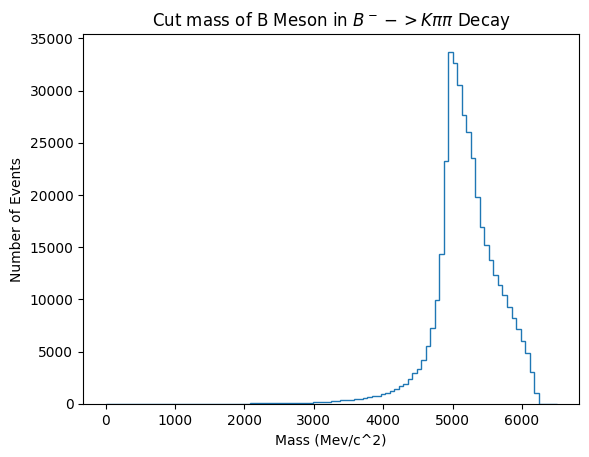

In [ ]:
#Plotting the full_minus_B with the cut_minus_B both for KPP
plt.hist(mass_mother_Cut_minusKPP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

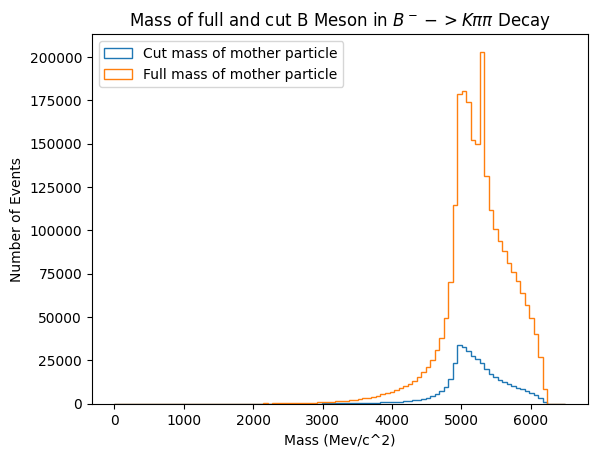

In [ ]:
#Plotting the full_minus_B with the cut_minus_B both for KPP
plt.hist(mass_mother_Cut_minusKPP,100, range = [0,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of B Meson in B- ->Kpipi Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_full_minusKPP,100, range = [0,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^- ->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.legend(loc = "upper left")

2525645
2610178


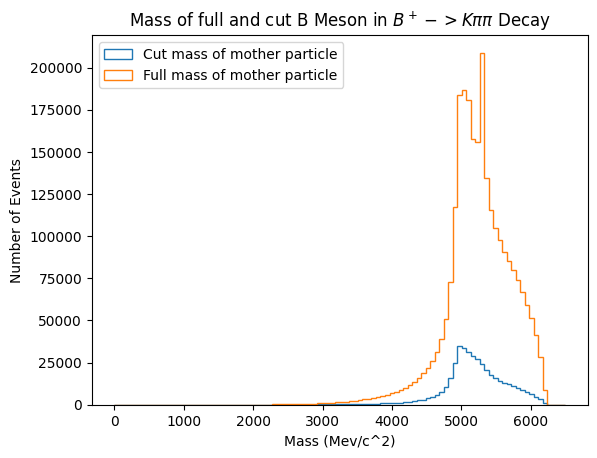

In [ ]:
#Plotting the full_plus_B with the cut_plus_B both for KPP
plt.hist(mass_mother_Cut_plusKPP,100, range = [0,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of B Meson in B+ ->Kpipi Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_full_plusKPP,100, range = [0,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^+ ->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")
print(len(mass_mother_full_minusKPP))
print(len(mass_mother_full_plusKPP))

plt.legend(loc = "upper left")

In [ ]:
print(len(mass_mother_Cut_minusKPP))
print(len(mass_mother_Cut_plusKPP))
Events_KPPplus = len(mass_mother_Cut_plusKPP)
Events_KPPminus = len(mass_mother_Cut_minusKPP)

print("Number of B+ ->Kpipi events is: " + str(Events_KPPplus))
print("Number of B- ->Kpipi events is: " + str(Events_KPPminus))

401541
421072
Number of B+ ->Kpipi events is: 421072
Number of B- ->Kpipi events is: 401541


In [ ]:
#sectioning the full mass of the B- -> Kpipi
A_ONE_fullKPPminus = []
A_TWO_fullKPPminus = []
A_THREE_fullKPPminus = []

for venti in mass_mother_full_minusKPP:
  if venti > 0 and venti <= 4800:
    A_ONE_fullKPPminus.append(venti)
  elif venti > 4800 and venti <=5300:
    A_TWO_fullKPPminus.append(venti)
  else:
    A_THREE_fullKPPminus.append(venti)

Text(0.5, 0, 'Mass (Mev/c^2)')

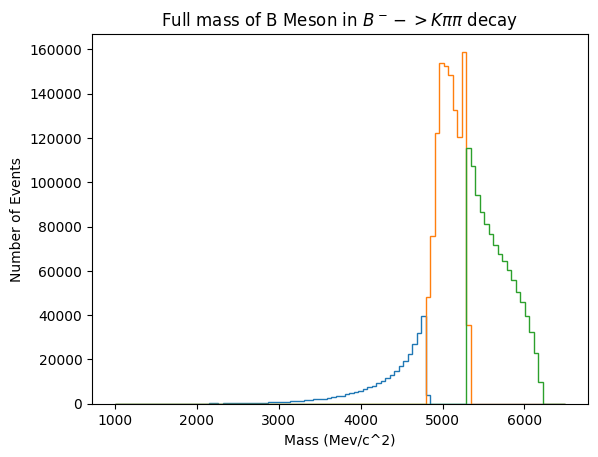

In [ ]:
#Plotting each section together, FULL
plt.hist(A_ONE_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B- ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B- ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^- ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Sectioning the cut mass of B- -> Kpipi

A_ONE_cutKPPminus = []
A_TWO_cutKPPminus = []
A_THREE_cutKPPminus = []

for grande in mass_mother_Cut_minusKPP:
  if grande > 0 and grande <= 4800:
    A_ONE_cutKPPminus.append(grande)
  elif grande > 4800 and grande <=5300:
    A_TWO_cutKPPminus.append(grande)
  else:
    A_THREE_cutKPPminus.append(grande)

Text(0.5, 0, 'Mass (Mev/c^2)')

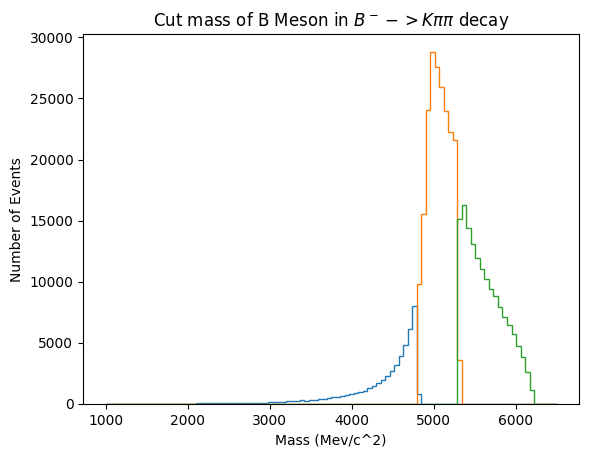

In [ ]:
#Plotting each section together, CUT
plt.hist(A_ONE_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut Mass of B Meson in B- ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut Mass of B Meson in B- ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Calculating the selection efficiencies for the B- -> Kpipi

sel_eff_KPPBminus_one = len(A_ONE_cutKPPminus)/float(len(A_ONE_fullKPPminus))
print("The selection efficiency for the left tail of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_one))

sel_eff_KPPBminus_two = len(A_TWO_cutKPPminus)/float(len(A_TWO_fullKPPminus))
print("The selection efficiency for the peak of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_two))

sel_eff_KPPBminus_three = len(A_THREE_cutKPPminus)/float(len(A_THREE_fullKPPminus))
print("The selection efficiency for the right tail of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_three))


# Calculating full selection efficiency
percent_rightminus = len(A_ONE_cutKPPminus) / float(len(mass_mother_Cut_minusKPP))
percent_peakminus = len(A_TWO_cutKPPminus) / float(len(mass_mother_Cut_minusKPP))
percent_leftminus = len(A_THREE_cutKPPminus) / float(len(mass_mother_Cut_minusKPP))

print(percent_rightminus)
print(percent_peakminus)
print(percent_leftminus)

full_sel_effKPPminus = (sel_eff_KPPBminus_one * percent_rightminus) + (sel_eff_KPPBminus_two * percent_peakminus) + (sel_eff_KPPBminus_three) * percent_leftminus
print("the full sel efficiency is: " + str(full_sel_effKPPminus))


The selection efficiency for the left tail of the B- -> Kpipi is: 0.16451986273089705
The selection efficiency for the peak of the B- -> Kpipi is: 0.17688808276794518
The selection efficiency for the right tail of the B- -> Kpipi is: 0.1384868837448246
0.12106360247147863
0.5056694086033555
0.3732669889251658
the full sel efficiency is: 0.16105684156362396


In [ ]:
#Sectioning the full mass of B+ -> Kpipi
A_ONE_fullKPPplus = []
A_TWO_fullKPPplus = []
A_THREE_fullKPPplus = []

for mocha in mass_mother_full_plusKPP:
  if mocha > 0 and mocha <= 4800:
    A_ONE_fullKPPplus.append(mocha)
  elif mocha > 4800 and mocha <=5300:
    A_TWO_fullKPPplus.append(mocha)
  else:
    A_THREE_fullKPPplus.append(mocha)

Text(0.5, 0, 'Mass (Mev/c^2)')

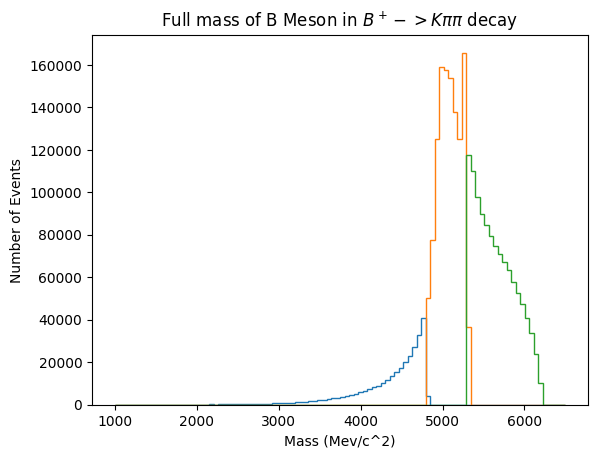

In [ ]:
#Plotting each section together, FULL
plt.hist(A_ONE_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full Mass of B Meson in B+ ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full Mass of B Meson in B+ ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^+ ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Sectioning the cut mass of B+ -> Kpipi

A_ONE_cutKPPplus = []
A_TWO_cutKPPplus = []
A_THREE_cutKPPplus = []

for cappucino in mass_mother_Cut_plusKPP:
  if cappucino > 0 and cappucino <= 4800:
    A_ONE_cutKPPplus.append(cappucino)
  elif cappucino > 4800 and cappucino <=5300:
    A_TWO_cutKPPplus.append(cappucino)
  else:
    A_THREE_cutKPPplus.append(cappucino)

Text(0.5, 0, 'Mass (Mev/c^2)')

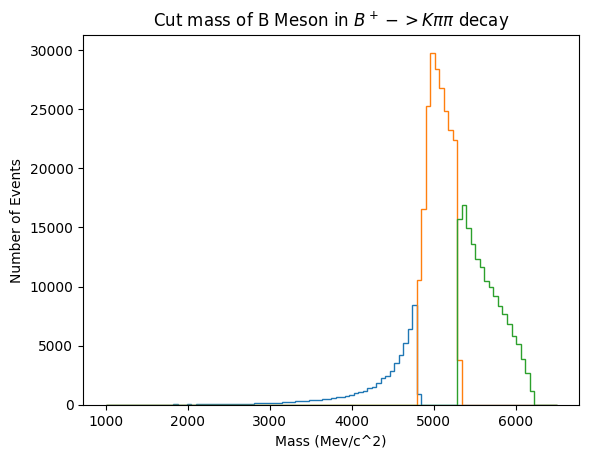

In [ ]:
#Plotting each section together
plt.hist(A_ONE_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut Mass of B Meson in B+ ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut Mass of B Meson in B+ ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^+ ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Calculating the selection efficiencies for the B+ -> Kpipi

sel_eff_KPPBplus_one = len(A_ONE_cutKPPplus)/float(len(A_ONE_fullKPPplus))
print("The selection efficiency for the left tail of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_one))

sel_eff_KPPBplus_two = len(A_TWO_cutKPPplus)/float(len(A_TWO_fullKPPplus))
print("The selection efficiency for the peak of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_two))

sel_eff_KPPBplus_three = len(A_THREE_cutKPPplus)/float(len(A_THREE_fullKPPplus))
print("The selection efficiency for the right tail of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_three))

# Calculating full selection efficiency
percent_rightplus = len(A_ONE_cutKPPplus) / float(len(mass_mother_Cut_plusKPP))
percent_peakplus = len(A_TWO_cutKPPplus) / float(len(mass_mother_Cut_plusKPP))
percent_leftplus = len(A_THREE_cutKPPplus) / float(len(mass_mother_Cut_plusKPP))

print(percent_rightplus)
print(percent_peakplus)
print(percent_leftplus)

full_sel_effKPPplus = (sel_eff_KPPBplus_one * percent_rightplus) + (sel_eff_KPPBplus_two * percent_peakplus) + (sel_eff_KPPBplus_three) * percent_leftplus
print("the full sel efficiency is: " + str(full_sel_effKPPplus))

The selection efficiency for the left tail of the B+ -> Kpipi is: 0.177081907102712
The selection efficiency for the peak of the B+ -> Kpipi is: 0.17817315703981754
The selection efficiency for the right tail of the B+ -> Kpipi is: 0.13927553028393164
0.12593333206672494
0.5027643728388494
0.37130229509442564
the full sel efficiency is: 0.16359295421093345


In [ ]:
#Getting the masses of each daughter particle in B->Kpipi (plus)

Ptot_H1plus = sqrt((Tree_Cut_plusKPP["H1_PX"] + Tree_Cut_plusKPP["H1_PY"] + Tree_Cut_plusKPP["H1_PZ"])**2)
Ptot_H2plus = sqrt((Tree_Cut_plusKPP["H2_PX"] + Tree_Cut_plusKPP["H2_PY"] + Tree_Cut_plusKPP["H2_PZ"])**2)
Ptot_H3plus = sqrt((Tree_Cut_plusKPP["H3_PX"] + Tree_Cut_plusKPP["H3_PY"] + Tree_Cut_plusKPP["H3_PZ"])**2)

mass_Kaonplus = sqrt(E_H1TOT_Cut_plusKPP**2 - Ptot_H1plus**2)
mass_Pion1plus = sqrt(E_H2TOT_Cut_plusKPP**2 - Ptot_H2plus**2)
mass_Pion2plus = sqrt(E_H3TOT_Cut_plusKPP**2 - Ptot_H3plus**2)

<ipython-input-29-5f3fb64e1a02>:7: RuntimeWarning: invalid value encountered in sqrt
  mass_Kaonplus = sqrt(E_H1TOT_Cut_plusKPP**2 - Ptot_H1plus**2)
<ipython-input-29-5f3fb64e1a02>:8: RuntimeWarning: invalid value encountered in sqrt
  mass_Pion1plus = sqrt(E_H2TOT_Cut_plusKPP**2 - Ptot_H2plus**2)
<ipython-input-29-5f3fb64e1a02>:9: RuntimeWarning: invalid value encountered in sqrt
  mass_Pion2plus = sqrt(E_H3TOT_Cut_plusKPP**2 - Ptot_H3plus**2)


In [ ]:
print(len(mass_Kaonplus))
print(len(mass_Pion1plus))
mass_mother_full_neg_plusKPP = []
mass_mother_full_neg_minusKPP = []
zero1 = []
mass_mother_full_pos_plusKPP = []
mass_mother_full_pos_minusKPP = []
zero2 = []

for i in mass_Kaonplus:
  if i < 0:
    mass_mother_full_neg_plusKPP.append(i)
  if i > 0:
    mass_mother_full_pos_plusKPP.append(i)
  if i == 0:
    zero1.append(i)

for i in mass_Pion1plus:
  if i < 0:
    mass_mother_full_neg_minusKPP.append(i)
  if i > 0:
    mass_mother_full_pos_minusKPP.append(i)
  if 1 ==0:
    zero2.append(i)


print(len(mass_mother_full_neg_plusKPP))
print(len(mass_mother_full_neg_minusKPP))
print(len(zero1))
print(len(zero2))
print(len(mass_mother_full_pos_plusKPP))
print(len(mass_mother_full_pos_minusKPP))


421072
421072
0
0
0
0
200257
221639


In [ ]:
#Trying to get rid of the NaN for B+

cleaned_MKplus = []

for one in mass_Kaonplus:
  if one > 0:
    cleaned_MKplus.append(one)

cleaned_MP1plus = []

for two in mass_Pion1plus:
  if two > 0:
    cleaned_MP1plus.append(two)

cleaned_MP2plus = []

for three in mass_Pion2plus:
  if three > 0:
    cleaned_MP2plus.append(three)

print (len(cleaned_MKplus))
print (len(cleaned_MP1plus))
print (len(cleaned_MP2plus))

#mass_Kaon = cleaned_MKplus
#mass_Pion1 = cleaned_MP1plus
#mass_Pion2 = cleaned_MP2plus


#print(mass_Kaon + mass_Pion1)

200257
221639
200037


In [ ]:
#Getting the masses of each daughter particle in B->Kpipi (minus)

Ptot_H1minus = sqrt((Tree_Cut_minusKPP["H1_PX"] + Tree_Cut_minusKPP["H1_PY"] + Tree_Cut_minusKPP["H1_PZ"])**2)
Ptot_H2minus = sqrt((Tree_Cut_minusKPP["H2_PX"] + Tree_Cut_minusKPP["H2_PY"] + Tree_Cut_minusKPP["H2_PZ"])**2)
Ptot_H3minus = sqrt((Tree_Cut_minusKPP["H3_PX"] + Tree_Cut_minusKPP["H3_PY"] + Tree_Cut_minusKPP["H3_PZ"])**2)

mass_Kaonminus = sqrt(E_H1TOT_Cut_minusKPP**2 - Ptot_H1minus**2)
mass_Pion1minus = sqrt(E_H2TOT_Cut_minusKPP**2 - Ptot_H2minus**2)
mass_Pion2minus = sqrt(E_H3TOT_Cut_minusKPP**2 - Ptot_H3minus**2)

print(mass_Pion2minus)
print(mass_Kaonminus)

[56865.33945242            nan            nan ... 35422.94128596
            nan 48088.39560593]
[           nan            nan            nan ...            nan
 88550.1548005   4226.69151724]


<ipython-input-32-8b30db16f598>:7: RuntimeWarning: invalid value encountered in sqrt
  mass_Kaonminus = sqrt(E_H1TOT_Cut_minusKPP**2 - Ptot_H1minus**2)
<ipython-input-32-8b30db16f598>:8: RuntimeWarning: invalid value encountered in sqrt
  mass_Pion1minus = sqrt(E_H2TOT_Cut_minusKPP**2 - Ptot_H2minus**2)
<ipython-input-32-8b30db16f598>:9: RuntimeWarning: invalid value encountered in sqrt
  mass_Pion2minus = sqrt(E_H3TOT_Cut_minusKPP**2 - Ptot_H3minus**2)


In [ ]:
#Trying to get rid of the NaN for B-

cleaned_MKminus = []

for one_minus in mass_Kaonminus:
  if one_minus > 0:
    cleaned_MKminus.append(one_minus)

cleaned_MP1minus = []

for two_minus in mass_Pion1minus:
  if two_minus > 0:
    cleaned_MP1minus.append(two_minus)

cleaned_MP2minus = []

for three_minus in mass_Pion2minus:
  if three_minus >0:
    cleaned_MP2minus.append(three_minus)

print (len(cleaned_MKminus))
print (len(cleaned_MP1minus))
print (len(cleaned_MP2minus))

194681
208206
218872


Text(0.5, 0, 'Mass (Mev/c^2)')

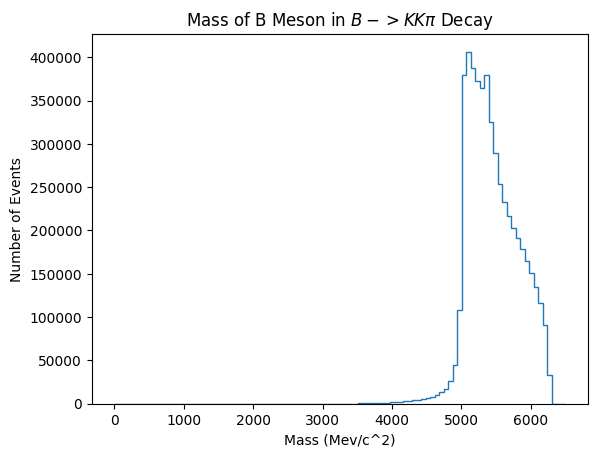

In [ ]:
#Moving on to separating data of the B->KKpi decay


#Constructing the mass of each daughter particle in the B->KKpi decay
E_H1_TOT = sqrt(mass_K**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2_TOT = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3_TOT = sqrt(mass_pi**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total mass of the B meson
E_TOT_ = E_H1_TOT + E_H2_TOT + E_H3_TOT

#Constructing the total momentum of the B meson
P_TOT_ = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother_KKpi = sqrt(E_TOT_**2 - P_TOT_**2)

#Plotting the B meson's mass
plt.hist(mass_mother_KKpi,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in $B->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Now find the full data for B+ and B- for KKP decay

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_full_minusKKP = sqrt(mass_K**2 + sqrt(Tree_full_minus["H1_PX"]**2 + Tree_full_minus["H1_PY"]**2 + Tree_full_minus["H1_PZ"]**2)**2)
E_H2TOT_full_minusKKP = sqrt(mass_K**2 + sqrt(Tree_full_minus["H2_PX"]**2 + Tree_full_minus["H2_PY"]**2 + Tree_full_minus["H2_PZ"]**2)**2)
E_H3TOT_full_minusKKP = sqrt(mass_pi**2 + sqrt(Tree_full_minus["H3_PX"]**2 + Tree_full_minus["H3_PY"]**2 + Tree_full_minus["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_full_minusKKP = E_H1TOT_full_minusKKP + E_H2TOT_full_minusKKP + E_H3TOT_full_minusKKP

#Assigning the total cut momentum into a variable
P_TOT_full_minusKKP = sqrt((Tree_full_minus["H1_PX"] + Tree_full_minus["H2_PX"] + Tree_full_minus["H3_PX"])**2 + (Tree_full_minus["H1_PY"] + Tree_full_minus["H2_PY"] + Tree_full_minus["H3_PY"])**2 + (Tree_full_minus["H1_PZ"] + Tree_full_minus["H2_PZ"] + Tree_full_minus["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_full_minusKKP = sqrt(E_TOT_full_minusKKP**2 - P_TOT_full_minusKKP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_full_plusKKP = sqrt(mass_K**2 + sqrt(Tree_full_plus["H1_PX"]**2 + Tree_full_plus["H1_PY"]**2 + Tree_full_plus["H1_PZ"]**2)**2)
E_H2TOT_full_plusKKP = sqrt(mass_K**2 + sqrt(Tree_full_plus["H2_PX"]**2 + Tree_full_plus["H2_PY"]**2 + Tree_full_plus["H2_PZ"]**2)**2)
E_H3TOT_full_plusKKP = sqrt(mass_pi**2 + sqrt(Tree_full_plus["H3_PX"]**2 + Tree_full_plus["H3_PY"]**2 + Tree_full_plus["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_full_plusKKP = E_H1TOT_full_plusKKP + E_H2TOT_full_plusKKP + E_H3TOT_full_plusKKP

#Assigning the total cut momentum into a variable
P_TOT_full_plusKKP = sqrt((Tree_full_plus["H1_PX"] + Tree_full_plus["H2_PX"] + Tree_full_plus["H3_PX"])**2 + (Tree_full_plus["H1_PY"] + Tree_full_plus["H2_PY"] + Tree_full_plus["H3_PY"])**2 + (Tree_full_plus["H1_PZ"] + Tree_full_plus["H2_PZ"] + Tree_full_plus["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_full_plusKKP = sqrt(E_TOT_full_plusKKP**2 - P_TOT_full_plusKKP**2)

In [ ]:
#Again for the B->KKpi

#So I'm separating the data into B+ and B- data according to the analysis from the previous block
Tree_Cut_minusKKP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.1)&(H1_ProbPi<0.9)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plusKKP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.1)&(H1_ProbPi<0.9)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Cut_minusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKKP["H2_PX"]**2 + Tree_Cut_minusKKP["H2_PY"]**2 + Tree_Cut_minusKKP["H2_PZ"]**2)**2)
E_H2TOT_Cut_minusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKKP["H3_PX"]**2 + Tree_Cut_minusKKP["H3_PY"]**2 + Tree_Cut_minusKKP["H3_PZ"]**2)**2)
E_H3TOT_Cut_minusKKP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKKP["H1_PX"]**2 + Tree_Cut_minusKKP["H1_PY"]**2 + Tree_Cut_minusKKP["H1_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_minusKKP = E_H1TOT_Cut_minusKKP + E_H2TOT_Cut_minusKKP + E_H3TOT_Cut_minusKKP

#Assigning the total cut momentum into a variable
P_TOTCUT_minusKKP = sqrt((Tree_Cut_minusKKP["H1_PX"] + Tree_Cut_minusKKP["H2_PX"] + Tree_Cut_minusKKP["H3_PX"])**2 + (Tree_Cut_minusKKP["H1_PY"] + Tree_Cut_minusKKP["H2_PY"] + Tree_Cut_minusKKP["H3_PY"])**2 + (Tree_Cut_minusKKP["H1_PZ"] + Tree_Cut_minusKKP["H2_PZ"] + Tree_Cut_minusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_minusKKP = sqrt(E_TOT_Cut_minusKKP**2 - P_TOTCUT_minusKKP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Cut_plusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKKP["H2_PX"]**2 + Tree_Cut_plusKKP["H2_PY"]**2 + Tree_Cut_plusKKP["H2_PZ"]**2)**2)
E_H2TOT_Cut_plusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKKP["H3_PX"]**2 + Tree_Cut_plusKKP["H3_PY"]**2 + Tree_Cut_plusKKP["H3_PZ"]**2)**2)
E_H3TOT_Cut_plusKKP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKKP["H1_PX"]**2 + Tree_Cut_plusKKP["H1_PY"]**2 + Tree_Cut_plusKKP["H1_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_plusKKP = E_H1TOT_Cut_plusKKP + E_H2TOT_Cut_plusKKP + E_H3TOT_Cut_plusKKP

#Assigning the total cut momentum into a variable
P_TOTCUT_plusKKP = sqrt((Tree_Cut_plusKKP["H1_PX"] + Tree_Cut_plusKKP["H2_PX"] + Tree_Cut_plusKKP["H3_PX"])**2 + (Tree_Cut_plusKKP["H1_PY"] + Tree_Cut_plusKKP["H2_PY"] + Tree_Cut_plusKKP["H3_PY"])**2 + (Tree_Cut_plusKKP["H1_PZ"] + Tree_Cut_plusKKP["H2_PZ"] + Tree_Cut_plusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_plusKKP = sqrt(E_TOT_Cut_plusKKP**2 - P_TOTCUT_plusKKP**2)

Text(0.5, 0, 'Mass (Mev/c^2)')

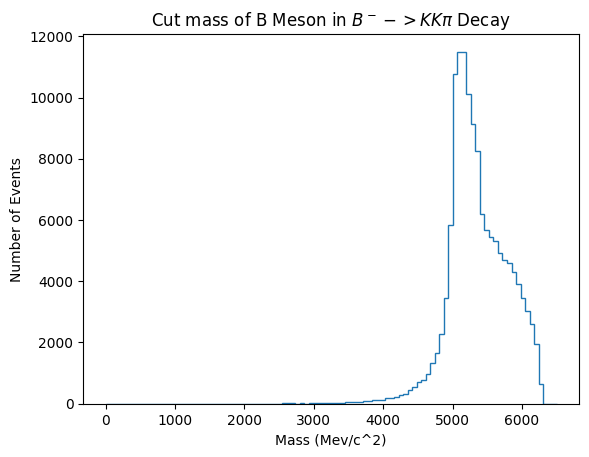

In [ ]:
plt.hist(mass_mother_Cut_minusKKP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

Text(0.5, 0, 'Mass (Mev/c^2)')

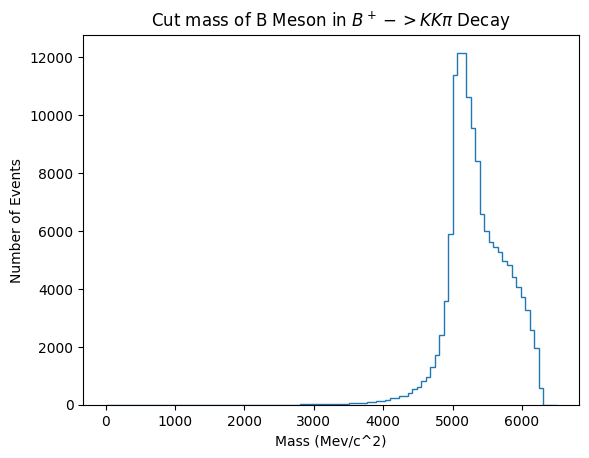

In [ ]:
plt.hist(mass_mother_Cut_plusKKP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^+ ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

2525645
2610178
2525645
2610178


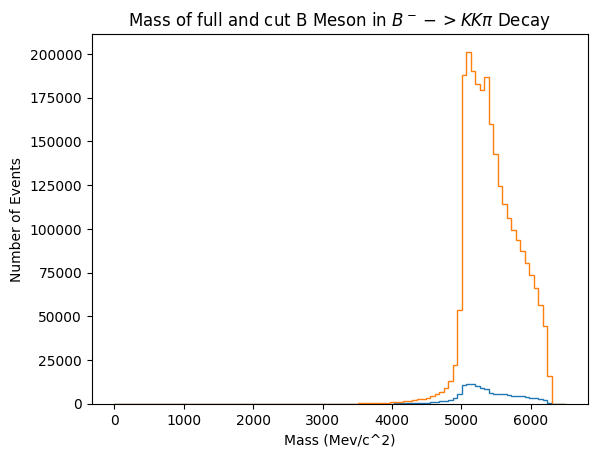

In [ ]:
#Plotting the full B- with the cut B- both for KKP
plt.hist(mass_mother_Cut_minusKKP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B- ->KKpi Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_full_minusKKP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^- ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")
print(len(mass_mother_full_minusKKP))
print(len(mass_mother_full_plusKKP))

print(len(mass_mother_full_minusKPP))
print(len(mass_mother_full_plusKPP))

Text(0.5, 0, 'Mass (Mev/c^2)')

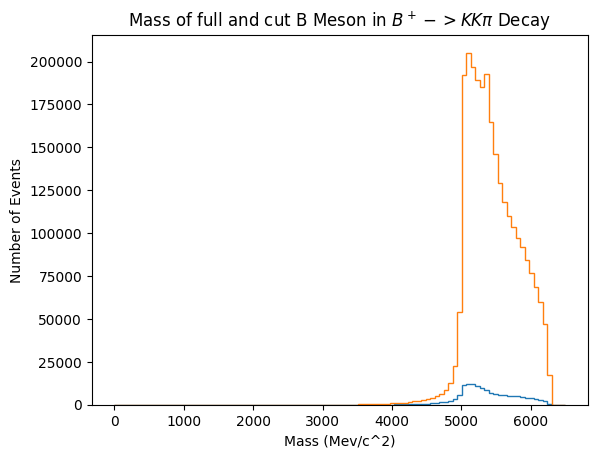

In [ ]:
#Plotting the full B+ with the cut B+ both for KKP
plt.hist(mass_mother_Cut_plusKKP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B+ ->KKpi Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_full_plusKKP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^+ ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
print(len(mass_mother_Cut_minusKKP))
print(len(mass_mother_Cut_plusKKP))

Events_KKPplus = len(mass_mother_Cut_plusKKP)
Events_KKPminus = len(mass_mother_Cut_minusKKP)

print("Number of B+ ->KKpi events is: " + str(Events_KKPplus))
print("Number of B- ->KKpi events is: " + str(Events_KKPminus))

138119
144097
Number of B+ ->KKpi events is: 144097
Number of B- ->KKpi events is: 138119


In [ ]:
#Sectioning the full mass of B- -> KKpi

A_ONE_fullKKPminus = []
A_TWO_fullKKPminus = []
A_THREE_fullKKPminus = []

for tinkerbell in mass_mother_full_minusKKP:
  if tinkerbell > 0 and tinkerbell <= 4800:
    A_ONE_fullKKPminus.append(tinkerbell)
  elif tinkerbell > 4800 and tinkerbell <=5300:
    A_TWO_fullKKPminus.append(tinkerbell)
  else:
    A_THREE_fullKKPminus.append(tinkerbell)

Text(0.5, 0, 'Mass (Mev/c^2)')

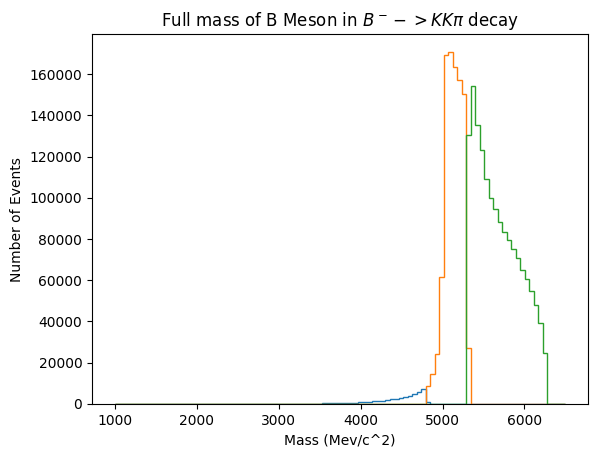

In [ ]:
#Plotting each section together, FULL
plt.hist(A_ONE_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full Mass of B Meson in B- ->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full Mass of B Meson in B- ->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^- ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Sectioning the cut mass of B- -> KKpi

A_ONE_cutKKPminus = []
A_TWO_cutKKPminus = []
A_THREE_cutKKPminus = []

for pickachu in mass_mother_Cut_minusKKP:
  if pickachu > 0 and pickachu <= 4800:
    A_ONE_cutKKPminus.append(pickachu)
  elif pickachu > 4800 and pickachu <=5300:
    A_TWO_cutKKPminus.append(pickachu)
  else:
    A_THREE_cutKKPminus.append(pickachu)

Text(0.5, 0, 'Mass (Mev/c^2)')

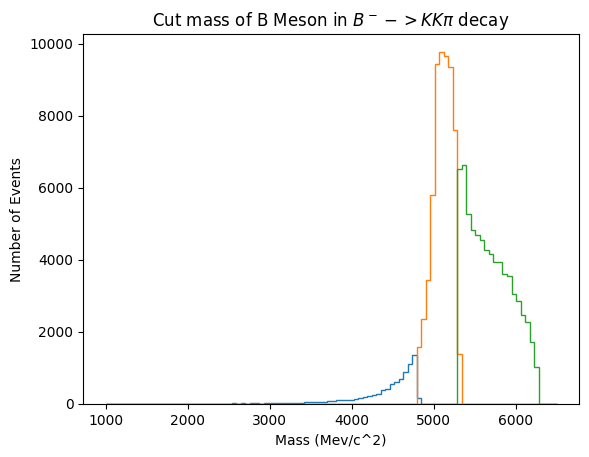

In [ ]:
#Plotting each section together, CUT
plt.hist(A_ONE_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut Mass of B Meson in B- ->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut Mass of B Meson in B- ->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Calculating the selection efficiencies for the B- -> KKpi

sel_eff_KKPminus_one = len(A_ONE_cutKKPminus)/float(len(A_ONE_fullKKPminus))
print("The selection efficiency for the left tail of the B- -> KKpi is: " + str(sel_eff_KKPminus_one))

sel_eff_KKPminus_two = len(A_TWO_cutKKPminus)/float(len(A_TWO_fullKKPminus))
print("The selection efficiency for the peak of the B- -> KKpi is: " + str(sel_eff_KKPminus_two))

sel_eff_KKPminus_three = len(A_THREE_cutKKPminus)/float(len(A_THREE_fullKKPminus))
print("The selection efficiency for the right tail of the B- -> KKpi is: " + str(sel_eff_KKPminus_three))

# Calculating full selection efficiency
percent_rightminus = len(A_ONE_cutKKPminus) / float(len(mass_mother_Cut_minusKKP))
percent_peakminus = len(A_TWO_cutKKPminus) / float(len(mass_mother_Cut_minusKKP))
percent_leftminus = len(A_THREE_cutKKPminus) / float(len(mass_mother_Cut_minusKKP))

print(percent_rightminus)
print(percent_peakminus)
print(percent_leftminus)

full_sel_effKKPminus = (sel_eff_KKPminus_one * percent_rightminus) + (sel_eff_KKPminus_two * percent_peakminus) + (sel_eff_KKPminus_three) * percent_leftminus
print("the full sel efficiency is: " + str(full_sel_effKKPminus))



The selection efficiency for the left tail of the B- -> KKpi is: 0.1929942196531792
The selection efficiency for the peak of the B- -> KKpi is: 0.0637945581435132
The selection efficiency for the right tail of the B- -> KKpi is: 0.04517318591482882
0.060433394391792586
0.4373981856225429
0.5021684199856645
the full sel efficiency is: 0.06225146717276958


In [ ]:
#Sectioning the full mass of B+ -> KKpi

A_ONE_fullKKPplus = []
A_TWO_fullKKPplus = []
A_THREE_fullKKPplus = []

for poohbear in mass_mother_full_plusKKP:
  if poohbear > 0 and poohbear <= 4800:
    A_ONE_fullKKPplus.append(poohbear)
  elif poohbear > 4800 and poohbear <=5300:
    A_TWO_fullKKPplus.append(poohbear)
  else:
    A_THREE_fullKKPplus.append(poohbear)

Text(0.5, 0, 'Mass (Mev/c^2)')

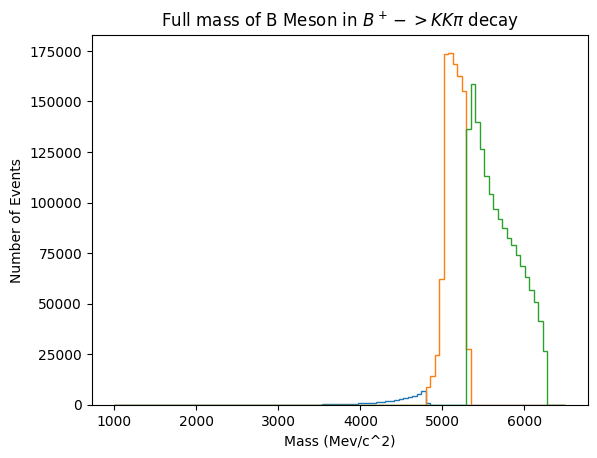

In [ ]:
#Plotting each section together, FULL
plt.hist(A_ONE_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full Mass of B Meson in B+ ->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full Mass of B Meson in B+ ->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^+ ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Sectioning the cut mass of B+ -> KKpi

A_ONE_cutKKPplus = []
A_TWO_cutKKPplus = []
A_THREE_cutKKPplus = []

for arvo in mass_mother_Cut_plusKKP:
  if arvo > 0 and arvo <= 4800:
    A_ONE_cutKKPplus.append(arvo)
  elif arvo > 4800 and arvo <=5300:
    A_TWO_cutKKPplus.append(arvo)
  else:
    A_THREE_cutKKPplus.append(arvo)

Text(0.5, 0, 'Mass (Mev/c^2)')

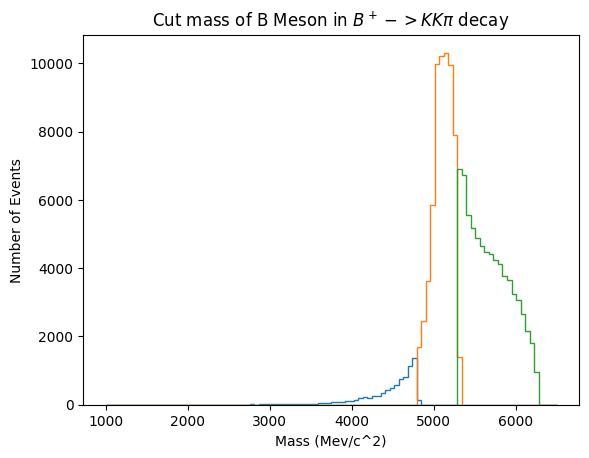

In [ ]:
#Plotting each section together, CUT
plt.hist(A_ONE_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut Mass of B Meson in B+ ->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut Mass of B Meson in B+->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^+ ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Calculating the selection efficiencies for the B+ -> KKpi

sel_eff_KKPBplus_one = len(A_ONE_cutKKPplus)/float(len(A_ONE_fullKKPplus))
print("The selection efficiency for the left tail of the B- -> KKpi is: " + str(sel_eff_KKPBplus_one))

sel_eff_KKPBplus_two = len(A_TWO_cutKKPplus)/float(len(A_TWO_fullKKPplus))
print("The selection efficiency for the peak of the B- -> KKpi is: " + str(sel_eff_KKPBplus_two))

sel_eff_KKPBplus_three = len(A_THREE_cutKKPplus)/float(len(A_THREE_fullKKPplus))
print("The selection efficiency for the right tail of the B- -> KKpi is: " + str(sel_eff_KKPBplus_three))

#Calculating full selection efficiency
percent_rightplus = len(A_ONE_cutKKPplus)/float(len(mass_mother_Cut_plusKKP))
percent_peakplus = len(A_TWO_cutKKPplus)/float(len(mass_mother_Cut_plusKKP))
percent_leftplus = len(A_THREE_cutKKPplus)/float(len(mass_mother_Cut_plusKKP))

print(percent_rightplus)
print(percent_peakplus)
print(percent_leftplus)

full_sel_effKKPplus = (sel_eff_KKPBplus_one*percent_rightplus)+(sel_eff_KKPBplus_two*percent_peakplus)+(sel_eff_KKPBplus_three)*percent_leftplus
print("the full sel efficiency is: " + str(full_sel_effKKPplus))

The selection efficiency for the left tail of the B- -> KKpi is: 0.1975790987535954
The selection efficiency for the peak of the B- -> KKpi is: 0.06530327654429319
The selection efficiency for the right tail of the B- -> KKpi is: 0.045350348295081805
0.05720452195396157
0.4400299798052701
0.5027654982407683
the full sel efficiency is: 0.06283840780726646


In [ ]:
#Getting the masses of each daughter particle in B->KKpi (plus)

Ptot_H1_plus = sqrt((Tree_Cut_plusKKP["H1_PX"] + Tree_Cut_plusKKP["H1_PY"] + Tree_Cut_plusKKP["H1_PZ"])**2)
Ptot_H2_plus = sqrt((Tree_Cut_plusKKP["H2_PX"] + Tree_Cut_plusKKP["H2_PY"] + Tree_Cut_plusKKP["H2_PZ"])**2)
Ptot_H3_plus = sqrt((Tree_Cut_plusKKP["H3_PX"] + Tree_Cut_plusKKP["H3_PY"] + Tree_Cut_plusKKP["H3_PZ"])**2)

mass_Kaon_KKPplus = sqrt(E_H1TOT_Cut_plusKKP**2 - Ptot_H1_plus**2)
mass_Pion1_KKPplus = sqrt(E_H2TOT_Cut_plusKKP**2 - Ptot_H2_plus**2)
mass_Pion2_KKPplus = sqrt(E_H3TOT_Cut_plusKKP**2 - Ptot_H3_plus**2)

<ipython-input-52-44433f41a66e>:7: RuntimeWarning: invalid value encountered in sqrt
  mass_Kaon_KKPplus = sqrt(E_H1TOT_Cut_plusKKP**2 - Ptot_H1_plus**2)
<ipython-input-52-44433f41a66e>:8: RuntimeWarning: invalid value encountered in sqrt
  mass_Pion1_KKPplus = sqrt(E_H2TOT_Cut_plusKKP**2 - Ptot_H2_plus**2)
<ipython-input-52-44433f41a66e>:9: RuntimeWarning: invalid value encountered in sqrt
  mass_Pion2_KKPplus = sqrt(E_H3TOT_Cut_plusKKP**2 - Ptot_H3_plus**2)


In [ ]:
#Trying to get rid of the NaN for B+

cleaned_MK_plus = []

for one_ in mass_Kaon_KKPplus:
  if one_ > 0:
    cleaned_MK_plus.append(one_)

cleaned_MP1_plus = []

for two_ in mass_Pion1_KKPplus:
  if two_ > 0:
    cleaned_MP1_plus.append(two_)

cleaned_MP2_plus = []

for three_ in mass_Pion2_KKPplus:
  if three_ > 0:
    cleaned_MP2_plus.append(three_)

print (len(cleaned_MK_plus))
print (len(cleaned_MP1_plus))
print (len(cleaned_MP2_plus))




50571
112034
56208


In [ ]:
#Getting the masses of each daughter particle in B->KKpi (minus)

Ptot_H1_minus = sqrt((Tree_Cut_minusKKP["H1_PX"] + Tree_Cut_minusKKP["H1_PY"] + Tree_Cut_minusKKP["H1_PZ"])**2)
Ptot_H2_minus = sqrt((Tree_Cut_minusKKP["H2_PX"] + Tree_Cut_minusKKP["H2_PY"] + Tree_Cut_minusKKP["H2_PZ"])**2)
Ptot_H3_minus = sqrt((Tree_Cut_minusKKP["H3_PX"] + Tree_Cut_minusKKP["H3_PY"] + Tree_Cut_minusKKP["H3_PZ"])**2)

mass_Kaon_KKPminus = sqrt(E_H1TOT_Cut_minusKKP**2 - Ptot_H1_minus**2)
mass_Pion1_KKPminus = sqrt(E_H2TOT_Cut_minusKKP**2 - Ptot_H2_minus**2)
mass_Pion2_KKPminus = sqrt(E_H3TOT_Cut_minusKKP**2 - Ptot_H3_minus**2)

<ipython-input-54-ef99959526d0>:7: RuntimeWarning: invalid value encountered in sqrt
  mass_Kaon_KKPminus = sqrt(E_H1TOT_Cut_minusKKP**2 - Ptot_H1_minus**2)
<ipython-input-54-ef99959526d0>:8: RuntimeWarning: invalid value encountered in sqrt
  mass_Pion1_KKPminus = sqrt(E_H2TOT_Cut_minusKKP**2 - Ptot_H2_minus**2)
<ipython-input-54-ef99959526d0>:9: RuntimeWarning: invalid value encountered in sqrt
  mass_Pion2_KKPminus = sqrt(E_H3TOT_Cut_minusKKP**2 - Ptot_H3_minus**2)


In [ ]:
#Trying to get rid of the NaN for B-

cleaned_MK_minus = []

for one_minus in mass_Kaon_KKPminus:
  if one_minus > 0:
    cleaned_MK_minus.append(one_minus)

cleaned_MP1_minus = []

for two_minus in mass_Pion1_KKPminus:
  if two_minus > 0:
    cleaned_MP1_minus.append(two_minus)

cleaned_MP2_minus = []

for three_minus in mass_Pion2_KKPminus:
  if three_minus > 0:
    cleaned_MP2_minus.append(three_minus)

print (len(cleaned_MK_minus))
print (len(cleaned_MP1_minus))
print (len(cleaned_MP2_minus))



49649
106114
54979


In [ ]:
Tree_total = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0)&(H1_ProbPi>0)&(H2_isMuon==0)&(H2_ProbK>0)&(H2_ProbPi>0)&(H3_isMuon==0)&(H3_ProbK>0)&(H3_ProbPi>0)", library="np")

E1_total = sqrt(mass_K**2 + sqrt(Tree_total["H1_PX"]**2 + Tree_total["H1_PY"]**2 + Tree_total["H1_PZ"]**2)**2)
E2_total = sqrt(mass_K**2 + sqrt(Tree_total["H2_PX"]**2 + Tree_total["H2_PY"]**2 + Tree_total["H2_PZ"]**2)**2)
E3_total = sqrt(mass_pi**2 + sqrt(Tree_total["H3_PX"]**2 + Tree_total["H3_PY"]**2 + Tree_total["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT = E1_total + E2_total + E3_total

#Assigning the total cut momentum into a variable
P_TOT = sqrt((Tree_total["H1_PX"] + Tree_total["H2_PX"] + Tree_total["H3_PX"])**2 + (Tree_total["H1_PY"] + Tree_total["H2_PY"] + Tree_total["H3_PY"])**2 + (Tree_total["H1_PZ"] + Tree_total["H2_PZ"] + Tree_total["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
total_events = sqrt(E_TOT**2 - P_TOT**2)

print(len(total_events))


3806171


In [ ]:
#Setting up the relative branching ratios for the B+ and B- decays

PID_eff_KPPplus = 0.04113
PID_eff_KKPplus = 0.0195
Trig_eff_KPPplus = 0.03667
Trig_eff_KKPplus = 0.01452
Sel_eff_KPPplus = full_sel_effKPPplus
Sel_eff_KKPplus = full_sel_effKKPplus

PID_eff_KPPminus = 0.04092
PID_eff_KKPminus = 0.02
Trig_eff_KPPminus = 0.03645
Trig_eff_KKPminus = 0.01498
Sel_eff_KPPminus = full_sel_effKPPminus
Sel_eff_KKPminus = full_sel_effKKPminus

print(Sel_eff_KPPplus)
print(Sel_eff_KKPplus)
print(Sel_eff_KPPminus)
print(Sel_eff_KKPminus)

Rel_BRplus = ((Events_KPPplus)/float(Events_KKPplus))*((Trig_eff_KKPplus)/float(Trig_eff_KPPplus))*((PID_eff_KKPplus)/float(PID_eff_KPPplus))*((Sel_eff_KKPplus)/float(Sel_eff_KPPplus))
Rel_BRminus = ((Events_KPPminus)/float(Events_KKPminus))*((Trig_eff_KKPminus)/float(Trig_eff_KPPminus))*((PID_eff_KKPminus)/float(PID_eff_KPPminus))*((Sel_eff_KKPminus)/float(Sel_eff_KPPminus))

print("The relative branching ratio value of B+ ->KPP/B+ ->KKP is: " + str(Rel_BRplus))
print("The relative branching ratio value of B- ->KPP/B- ->KKP is: " + str(Rel_BRminus))

0.16359295421093345
0.06283840780726646
0.16105684156362396
0.06225146717276958
The relative branching ratio value of B+ ->KPP/B+ ->KKP is: 0.21071410580130673
The relative branching ratio value of B- ->KPP/B- ->KKP is: 0.22571246086288851


In [ ]:
#True number of events

def total_eff(x):
  PID = "PID_eff_" + x
  Trig = "Trig_eff_" + x
  Sel = "Sel_eff_" + x
  tot = eval(PID) + eval(Trig) + eval(Sel)
  return tot

print(total_eff("KPPplus"))
True_num_KPPplus = len(mass_mother_Cut_plusKPP) * (1/total_eff("KPPplus"))
True_num_KPPminus = len(mass_mother_Cut_minusKPP) * (1/total_eff("KPPminus"))

True_num_KKPplus = len(mass_mother_Cut_plusKKP) * (1/total_eff("KKPplus"))
True_num_KKPminus = len(mass_mother_Cut_minusKKP) * (1/total_eff("KKPminus"))

print(True_num_KPPplus)
print(True_num_KPPminus)
print(True_num_KKPplus)
print(True_num_KKPminus)

0.24139295421093346
1744342.5446132112
1684126.658587008
1487707.7092443146
1420517.493113395


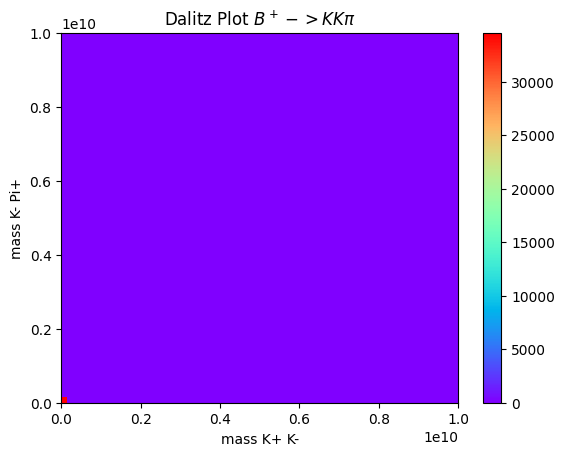

In [ ]:
#Dalitz plotting
#binning 8 by 8
#sqrt(m^2 + p^2)
#sqrt(signal?/(signal + backgrd) purity


import numpy as np
axlim = 10e9
nbin = 64
vbin = np.linspace(0, axlim, nbin + 1)

m1=cleaned_MK_plus
m2=cleaned_MK_plus
m3=cleaned_MP2_plus

m1 = np.array(m1)
m2 = np.array(m2)
m3 = np.array(m3)

#compute the pair-wise square of the invariant masses

m2_12 = (Ptot_H1 + Ptot_H2)**2
m2_13 = (Ptot_H1 + Ptot_H3)**2
m2_23 = (Ptot_H2 + Ptot_H3)**2

#use same formula with cut data for both plus and minus
mcut12_minus = (Ptot_H1_minus + Ptot_H2_minus)**2
mcut13_minus = (Ptot_H1_minus + Ptot_H3_minus)**2
mcut23_minus = (Ptot_H2_minus + Ptot_H3_minus)**2

mcut12_plus = (Ptot_H1_plus + Ptot_H2_plus)**2
mcut13_plus = (Ptot_H1_plus + Ptot_H3_plus)**2
mcut23_plus = (Ptot_H2_plus + Ptot_H3_plus)**2

#adjusting the
min_length = min(len(mcut12_minus.flatten()), len(mcut13_minus.flatten()), len(mcut23_minus.flatten()), len(mcut12_plus.flatten()), len(mcut13_plus.flatten()), len(mcut23_plus.flatten()))
mcut12_minus = mcut12_minus.flatten()[:min_length]
mcut13_minus = mcut13_minus.flatten()[:min_length]
mcut23_minus = mcut23_minus.flatten()[:min_length]

mcut12_plus = mcut12_plus.flatten()[:min_length]
mcut13_plus = mcut13_plus.flatten()[:min_length]
mcut23_plus = mcut23_plus.flatten()[:min_length]



#Differences 1,2 with 1,3 for the asymmetry Dalitz
diff_X = (mcut12_minus - mcut13_plus)/(mcut12_minus + mcut13_plus)
diff_Y = (mcut13_minus - mcut23_plus)/(mcut13_minus + mcut23_plus)


#color_values = norm_hist.flatten()[np.digitize(m1.flatten(), xedges) * 50 + np.digitize(m2.flatten(), yedges)]
#plt.scatter(m1m2.flatten(), m2m3.flatten(), cmap="rainbow", marker=".", alpha=0.5, s=1)
#plt.colorbar(label="event density")
#plt.xlim(0, 2e9)
#plt.ylim(0, 2e9)
#plt.xlabel("mass1&2")
#plt.ylabel("mass2&3")
#plt.title("KPiPi Dalitz Plot B+ -> Kkpi")
#plt.show()

plt.hist2d(m2_cut, diff_Y, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("mass K+ K-")
plt.ylabel("mass K- Pi+")
plt.title("Dalitz Plot $B^+ ->KK\pi$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

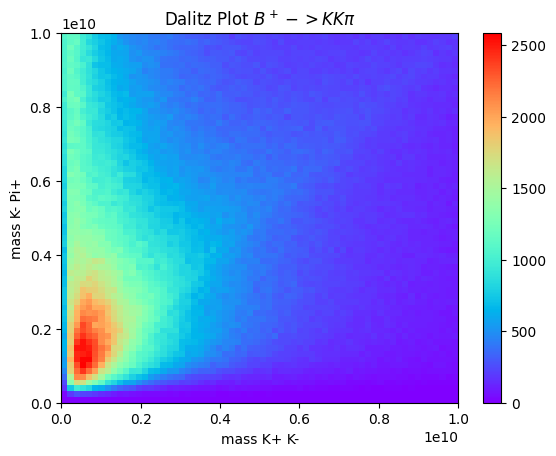

In [ ]:
plt.hist2d(m2_12, m2_13, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("mass K+ K-")
plt.ylabel("mass K- Pi+")
plt.title("Dalitz Plot $B^+ ->KK\pi$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

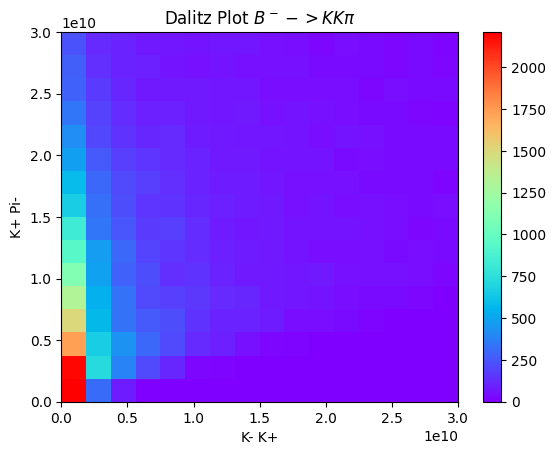

In [ ]:
#Dalitz plotting
import numpy as np
axlim = 30e9
nbin = 16
vbin = np.linspace(0, axlim, nbin + 1)

m1=cleaned_MK_minus
m2=cleaned_MK_minus
m3=cleaned_MP2_minus

m1 = np.array(m1)
m2 = np.array(m2)
m3 = np.array(m3)

min_length = min(len(m1.flatten()), len(m2.flatten()), len(m3.flatten()))
m1 = m1.flatten()[:min_length]
m2 = m2.flatten()[:min_length]
m3 = m3.flatten()[:min_length]

m1m2_minus = (m1 + m2)**2
m2m3_minus = (m2 + m3)**2

plt.hist2d(m1m2_minus, m2m3_minus, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("K- K+")
plt.ylabel("K+ Pi-")
plt.title("Dalitz Plot $B^- ->KK\pi$")
plt.colorbar()
plt.xlim(0, 30e9)
plt.ylim(0, 30e9)
plt.show()

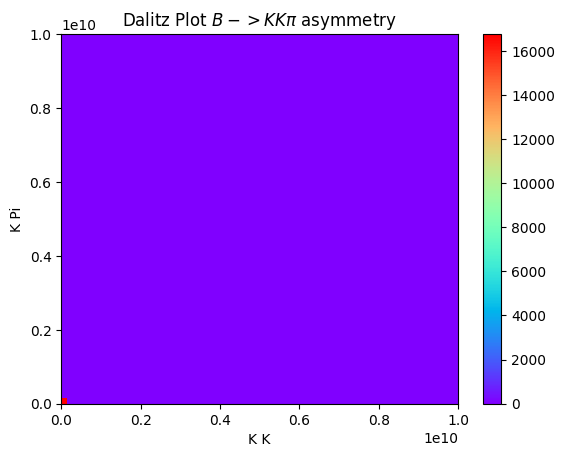

In [ ]:
min_length = min(len(m1m2_minus), len(m1m2_plus), len(m2m3_minus), len(m2m3_plus))

m1m2_minus = m1m2_minus[:min_length]
m1m2_plus = m1m2_plus[:min_length]
m2m3_minus = m2m3_minus[:min_length]
m2m3_plus = m2m3_plus[:min_length]

xdiff = (m1m2_minus - m1m2_plus)/(m1m2_minus + m1m2_plus)
ydiff = (m2m3_minus - m2m3_plus)/(m2m3_minus + m2m3_plus)

plt.hist2d(xdiff, ydiff, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("K K")
plt.ylabel("K Pi")
plt.title("Dalitz Plot $B->KK\pi$ asymmetry")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

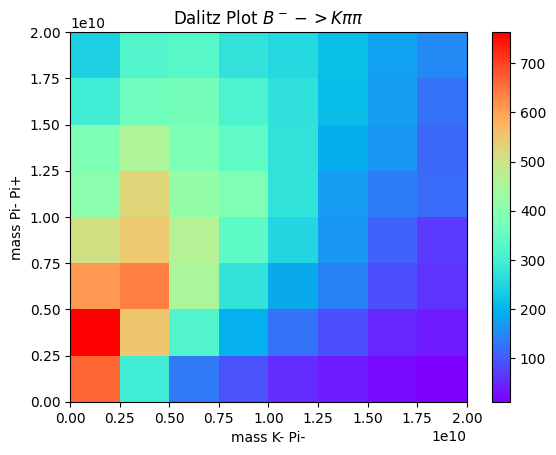

In [ ]:
axlim = 20e9
nbin = 8
vbin = np.linspace(0, axlim, nbin + 1)

m11=cleaned_MK_minus
m22=cleaned_MP1_minus
m33=cleaned_MP2_minus

m11 = np.array(m11)
m22 = np.array(m22)
m33 = np.array(m33)

min_length = min(len(m11.flatten()), len(m22.flatten()), len(m33.flatten()))
m11 = m11.flatten()[:min_length]
m22 = m22.flatten()[:min_length]
m33 = m33.flatten()[:min_length]

m1m2_minus = (m11 + m22)**2
m2m3_minus = (m22 + m33)**2
plt.hist2d(m1m2_minus, m2m3_minus, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("mass K- Pi-")
plt.ylabel("mass Pi- Pi+")
plt.title("Dalitz Plot $B^- ->K\pi\pi$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

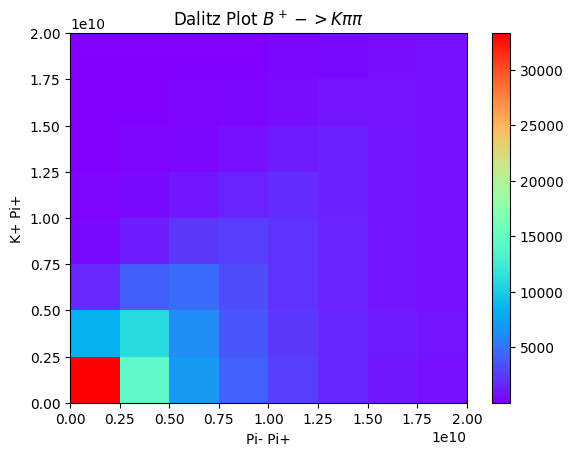

In [ ]:
axlim = 20e9
nbin = 8
vbin = np.linspace(0, axlim, nbin + 1)

m1kpp=cleaned_MKplus
m2kpp=cleaned_MP1plus
m3kpp=cleaned_MP2plus

m1kpp = np.array(m1kpp)
m2kpp = np.array(m2kpp)
m3kpp = np.array(m3kpp)

min_length = min(len(m1kpp.flatten()), len(m2kpp.flatten()), len(m3kpp.flatten()))
m1kpp = m1kpp.flatten()[:min_length]
m2kpp = m2kpp.flatten()[:min_length]
m3kpp = m3kpp.flatten()[:min_length]

m1m2_plus = (m1kpp + m2kpp)**2
m2m3_plus = (m2kpp + m3kpp)**2
plt.hist2d(m1m2_plus, m2m3_plus, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("Pi- Pi+")
plt.ylabel("K+ Pi+")
plt.title("Dalitz Plot $B^+ ->K\pi\pi$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

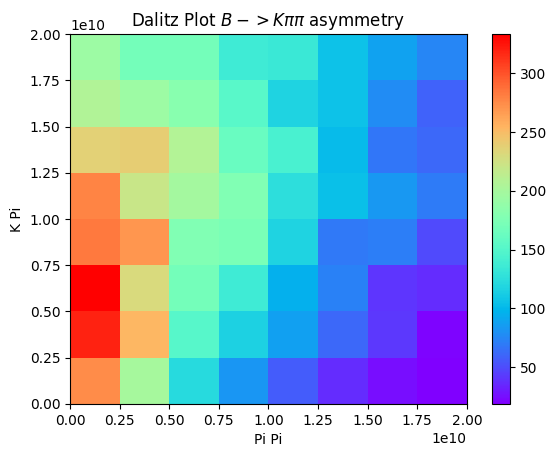

In [ ]:
min_length = min(len(m1m2_minus), len(m1m2_plus), len(m2m3_minus), len(m2m3_plus))

m1m2_minus = m1m2_minus[:min_length]
m1m2_plus = m1m2_plus[:min_length]
m2m3_minus = m2m3_minus[:min_length]
m2m3_plus = m2m3_plus[:min_length]

xdiff = m1m2_minus - m1m2_plus
ydiff = m2m3_minus - m2m3_plus

plt.hist2d(xdiff, ydiff, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("Pi Pi")
plt.ylabel("K Pi")
plt.title("Dalitz Plot $B->K\pi\pi$ asymmetry")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

Text(0.5, 0, 'Mass (Mev/c^2)')

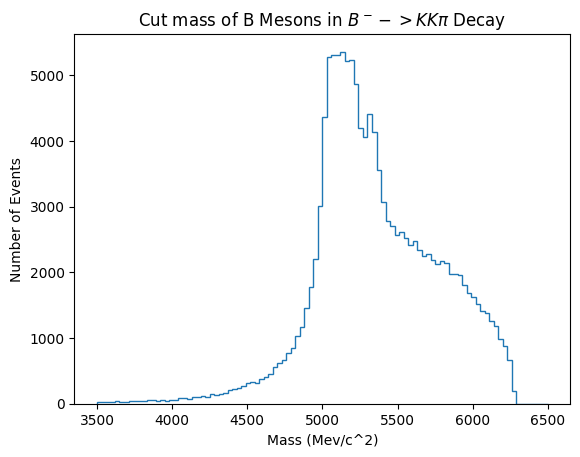

In [ ]:
plt.hist(mass_mother_Cut_minusKKP,100,range = [3500,6500], histtype = u'step', label="Mass of B- -> KKpi")
plt.title("Cut mass of B Mesons in $B^- ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

Text(0.5, 0, 'Mass (Mev/c^2)')

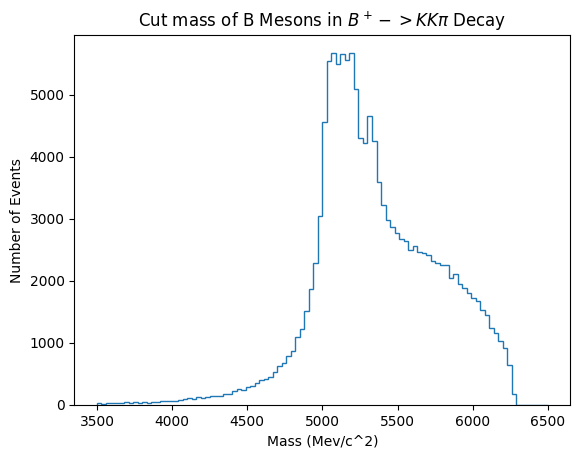

In [ ]:
plt.hist(mass_mother_Cut_plusKKP,100,range = [3500,6500], histtype = u'step', label="Mass of B- -> KKpi")
plt.title("Cut mass of B Mesons in $B^+->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

Text(0.5, 0, 'Mass (Mev/c^2)')

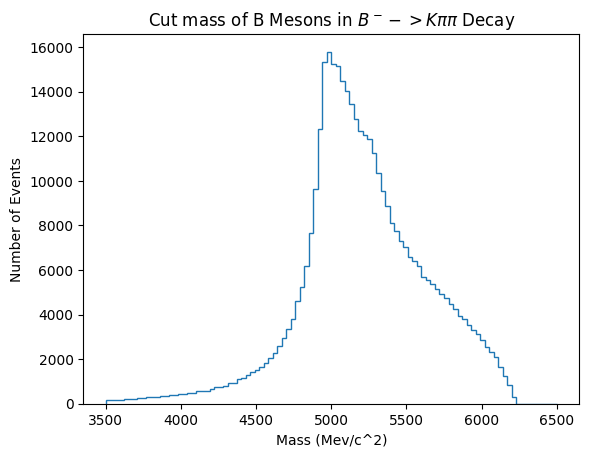

In [ ]:
plt.hist(mass_mother_Cut_minusKPP,100,range = [3500,6500], histtype = u'step', label="Mass of B- -> KKpi")
plt.title("Cut mass of B Mesons in $B^- ->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

Text(0.5, 0, 'Mass (Mev/c^2)')

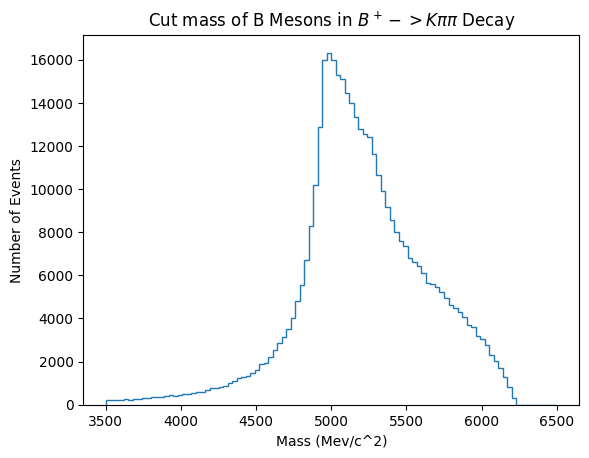

In [ ]:
plt.hist(mass_mother_Cut_plusKPP,100,range = [3500,6500], histtype = u'step', label="Mass of B- -> KKpi")
plt.title("Cut mass of B Mesons in $B^+ ->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
!pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 6.4 MB/s eta 0:00:00


The yields are: 17989.54078512768


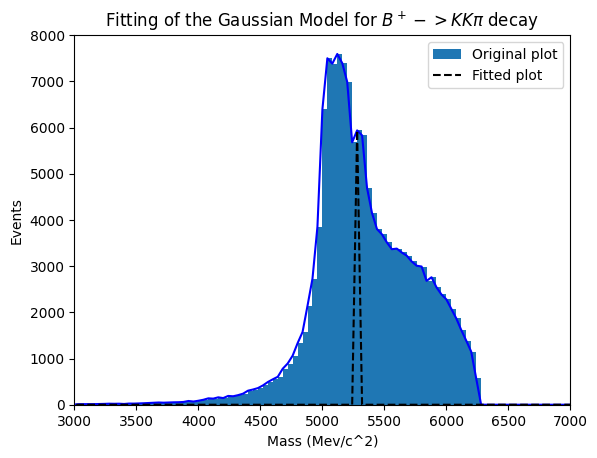

In [ ]:
#Importing curve fit and the gaussian & exponential models
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ExponentialModel

#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_plusKKP, 250, (0,10000), label = "Original plot")

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(gauss_center= 5280,gauss_amplitude = 8000,gauss_sigma = 4.0)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting the data and the best fit
plt.plot(mass[:-1], events, 10000, color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'black', label = "Fitted plot",linestyle="--")
plt.legend(loc = "upper right")
plt.xlim(3000,7000)
plt.ylim(0,8000)
#Adding titles
plt.title("Fitting of the Gaussian Model for $B^+ ->KK\pi$ decay")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")


#Printing the value of the fitted yield
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KKPplus = model_fitg.params['gauss_amplitude'].value

The yields are: 23306.182291490586


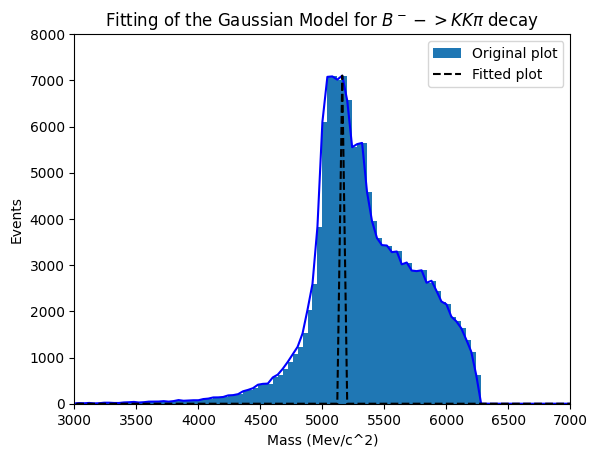

In [ ]:
#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_minusKKP, 250, (0,10000), label = "Original plot")

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(gauss_center= 5280,gauss_amplitude = 8000,gauss_sigma = 4.0)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting the data and the best fit
plt.plot(mass[:-1], events, 10000, color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'black', label = "Fitted plot",linestyle="--")
plt.legend(loc = "upper right")
plt.xlim(3000,7000)
plt.ylim(0,8000)
#Adding titles
plt.title("Fitting of the Gaussian Model for $B^- ->KK\pi$ decay")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")


#Printing the value of the fitted yield
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KKPminus = model_fitg.params['gauss_amplitude'].value

The yields are: 35164.0546178258


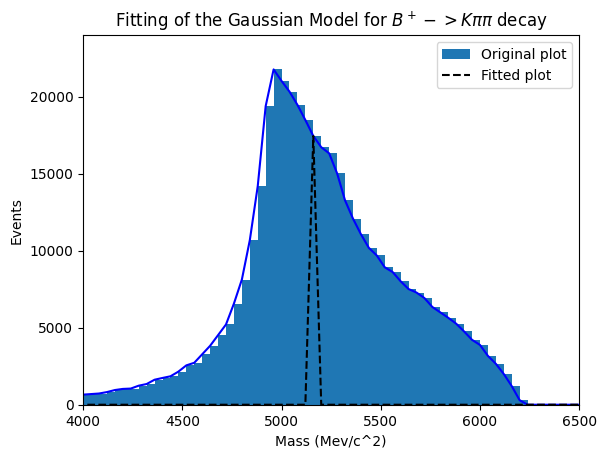

In [ ]:
#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_plusKPP, 250, (0,10000), label = "Original plot")

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(gauss_center= 5280,gauss_amplitude = 10850,gauss_sigma = 4.0)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting the data and the best fit
plt.plot(mass[:-1], events, 10000, color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'black', label = "Fitted plot",linestyle="--")
plt.legend(loc = "upper right")
plt.xlim(4000,6500)
plt.ylim(0,24000)
#Adding titles
plt.title("Fitting of the Gaussian Model for $B^+ ->K\pi\pi$ decay")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")


#Printing the value of the fitted yield
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KPPplus = model_fitg.params['gauss_amplitude'].value

The yields are: 23608.509495156428


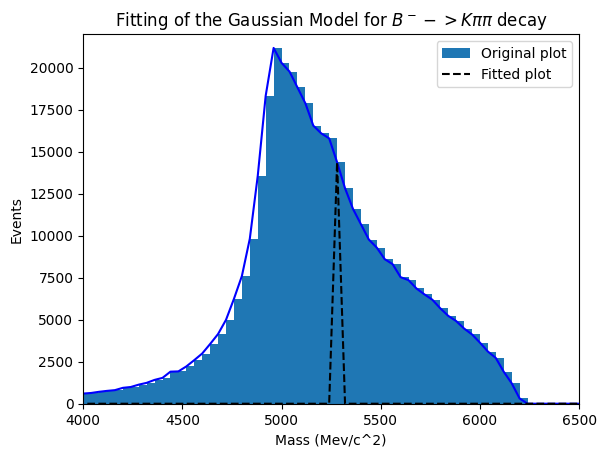

In [ ]:
#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_minusKPP, 250, (0,10000), label = "Original plot")

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(gauss_center= 5280,gauss_amplitude = 5850,gauss_sigma = 4.0)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting the data and the best fit
plt.plot(mass[:-1], events, 10000, color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'black', label = "Fitted plot",linestyle="--")
plt.legend(loc = "upper right")
plt.xlim(4000,6500)
plt.ylim(0, 22000)
#Adding titles
plt.title("Fitting of the Gaussian Model for $B^- ->K\pi\pi$ decay")
plt.ylabel("Events")
plt.xlabel("Mass (Mev/c^2)")


#Printing the value of the fitted yield
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KPPminus = model_fitg.params['gauss_amplitude'].value

In [ ]:
#Asymmetry B -> Kpipi

Asymmetry_Kpipi = (fitted_yield_KPPminus - fitted_yield_KPPplus)/float(fitted_yield_KPPminus + fitted_yield_KPPplus)

print("The Asymmetry Value for The B -> Kpipi decay is: " + str(Asymmetry_Kpipi))

The Asymmetry Value for The B -> Kpipi decay is: -0.1966146159703942


In [ ]:
#Asymmetry B -> KKpi

Asymmetry_KKpi = (fitted_yield_KKPminus - fitted_yield_KKPplus)/float(fitted_yield_KKPminus + fitted_yield_KKPplus)

print("The Asymmetry Value for The B -> KKpi decay is: " + str(Asymmetry_KKpi))

The Asymmetry Value for The B -> KKpi decay is: 0.12874557242886012


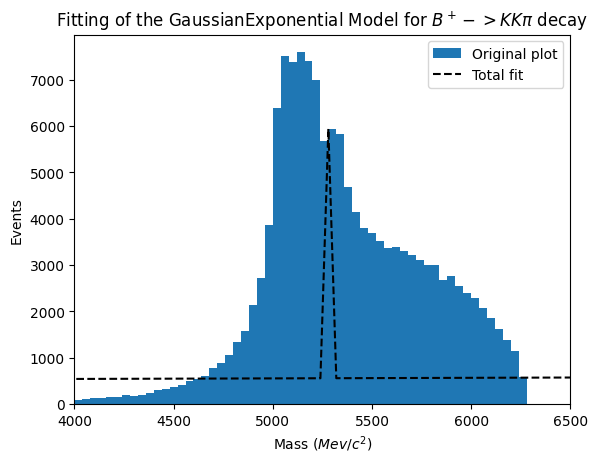

The yields are: 5850.9991971988775


In [ ]:
#GaussianExponential model fitting
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import Model

# Define a custom model that combines Gaussian and Exponential components
def gaussian_exponential(x, amp_gauss, cen_gauss, sigma_gauss, amp_exp, decay_exp):
    gauss = amp_gauss * np.exp(-(x - cen_gauss)**2 / (2 * sigma_gauss**2))
    exp = amp_exp * np.exp(-decay_exp * x)
    return gauss + exp

# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_plusKKP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(amp_gauss=6000, cen_gauss=5280, sigma_gauss=4.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
result = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_plusKKP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^+ ->KK\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(result.params['amp_gauss'].value))
fitted_yield_KKPplusGE = result.params['amp_gauss'].value

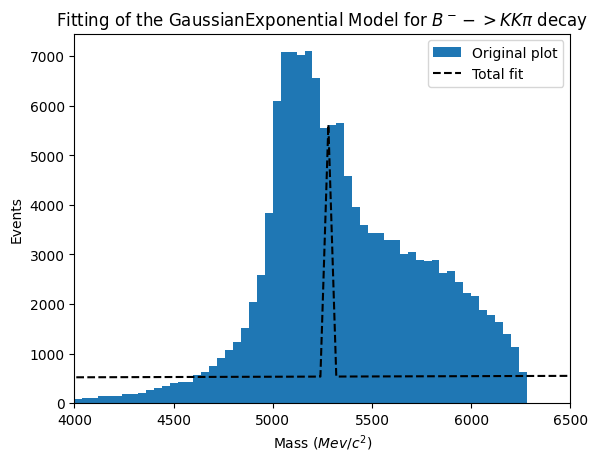

The yields are: 6672.539417610547


In [ ]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_minusKKP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(amp_gauss=7000, cen_gauss=5280, sigma_gauss=4.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
result = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_minusKKP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^- ->KK\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(result.params['amp_gauss'].value))
fitted_yield_KKPminusGE = result.params['amp_gauss'].value

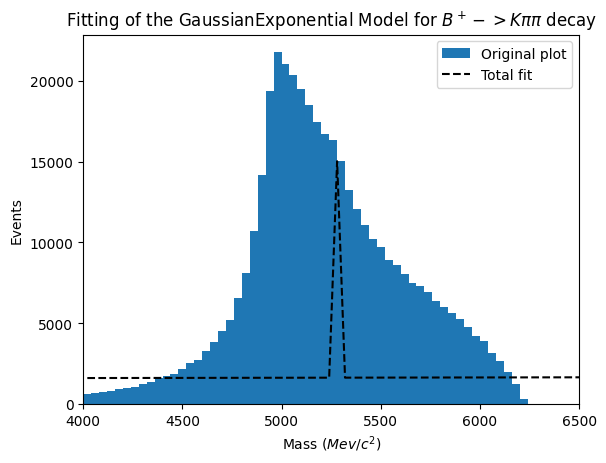

The yields are: 36864.3912392707


In [ ]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_plusKPP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(amp_gauss=41380, cen_gauss=5280, sigma_gauss=4.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
result = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_plusKPP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^+ ->K\pi\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(result.params['amp_gauss'].value))
fitted_yield_KPPplusGE = result.params['amp_gauss'].value

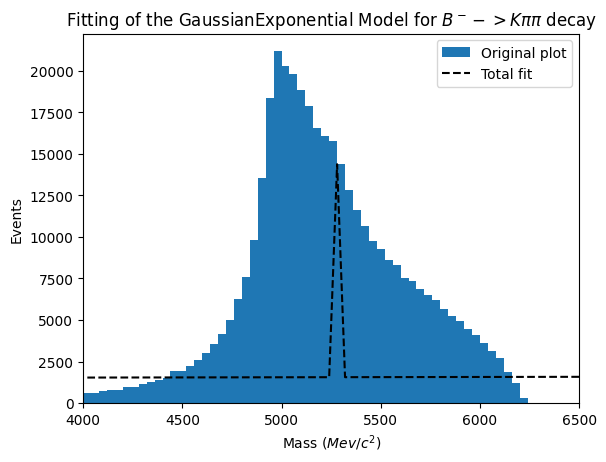

The yields are: 44013.735197742644


In [ ]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_minusKPP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(amp_gauss=41380, cen_gauss=5280, sigma_gauss=4.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
result = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_minusKPP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^- ->K\pi\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(result.params['amp_gauss'].value))
fitted_yield_KPPminusGE = result.params['amp_gauss'].value